# Build a classifier to determine whether a news article is fake or real

You are a new an AI Engineer, task with building an AI/ML classifier that helps politicians determine whether news articles trending on social media are fake or real.

Follow an approach similar to what we took in class, which looks something like the below.

- Preprocess the data
    - Remove stop words
    - Remove unwanted characters
    - Stemining
    - ...
- Split data between training and test sets
- Modeling strategies
    - Bag of words modeling including TF-IDF using traditional ML
    - LST modeling
    - Transformer modeling
    
Recommend the best model based on relevant metrics of your choice. Be sure to explain your rational, including relevant visualizations at every steps of your work

Minimal starter code has been provided below     

In [4]:
import pandas as pd

# Load the  Data

In [5]:
Fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

- Give the fake news label 0 :

In [6]:
Fake['label']=0

In [7]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [8]:
true['label']=1

In [9]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [10]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [11]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [13]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [14]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [15]:
News.isnull().sum()

,0
text,0
label,0


In [16]:
News.duplicated().sum()

6251

In [17]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

# Building a Fake News Classifier

### 1. **Data Preprocessing**

1. **Remove Stop Words**
2. **Remove Unwanted Characters**
3. **Stemming**
4. **Split Data into Training and Test Sets**

Below is the code for preprocessing the data:

In [19]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from tqdm.auto import tqdm  # Import tqdm for progress bars

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake['label'] = 0
true['label'] = 1

# Combine datasets
news = pd.concat([fake, true], ignore_index=True)

# Drop unnecessary columns
news.drop(columns=["title", "date", "subject"], inplace=True)

# Preprocess text data
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenization and stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing with tqdm for progress bar
tqdm.pandas(desc="Preprocessing Text Data")
news['text'] = news['text'].progress_apply(preprocess_text)

# Split the data
X = news['text']
y = news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data preprocessing completed and data split into training and test sets.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preprocessing Text Data:   0%|          | 0/44898 [00:00<?, ?it/s]

Data preprocessing completed and data split into training and test sets.


# 2. **Modeling Strategies**

We'll use both traditional machine learning models and advanced deep learning models.

## Traditional Machine Learning Models

We'll start with **Naive Bayes** and **Support Vector Machine (SVM)**.

label
0    23481
1    21417
Name: count, dtype: int64
label
0    16436
1    14992
Name: count, dtype: int64
label
0    7045
1    6425
Name: count, dtype: int64


Training and Evaluating Models:   0%|          | 0/4 [00:00<?, ?it/s]

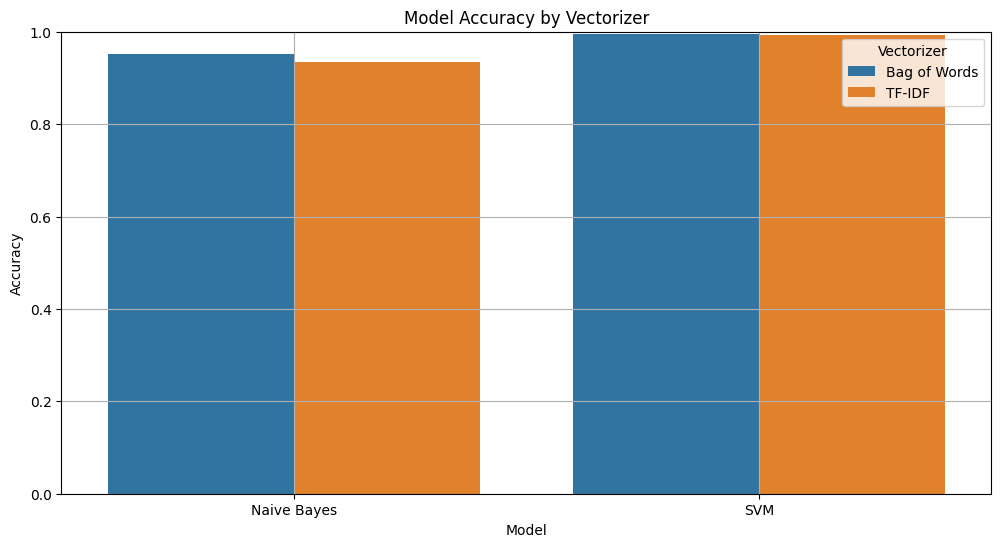

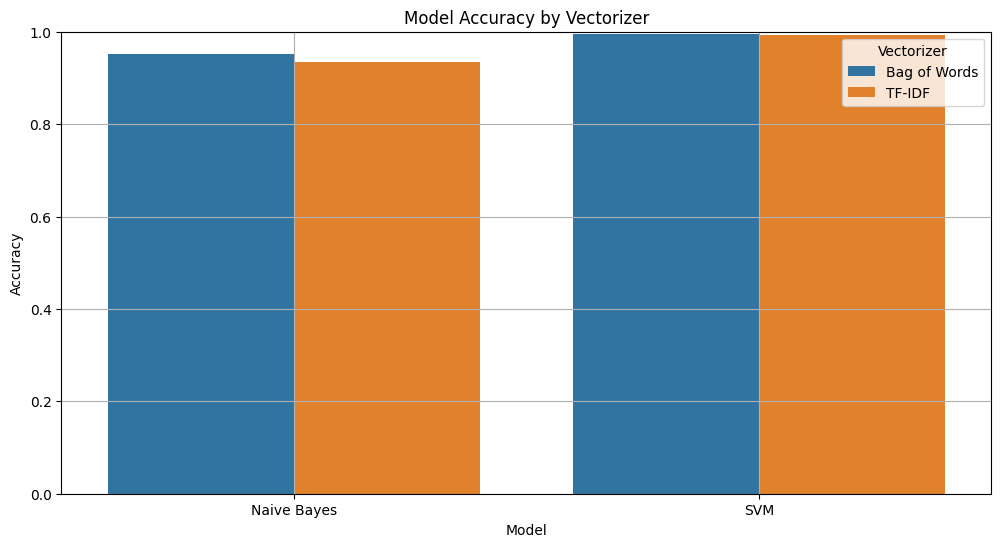

Model: Naive Bayes with Vectorizer: Bag of Words
Accuracy: 0.9507
Classification Report:
{'0': {'precision': 0.9562419562419563, 'recall': 0.9491838183108587, 'f1-score': 0.9526998147884315, 'support': 7045.0}, '1': {'precision': 0.9447274972981319, 'recall': 0.9523735408560311, 'f1-score': 0.9485351108355293, 'support': 6425.0}, 'accuracy': 0.9507052709725315, 'macro avg': {'precision': 0.950484726770044, 'recall': 0.950778679583445, 'f1-score': 0.9506174628119803, 'support': 13470.0}, 'weighted avg': {'precision': 0.9507497217420252, 'recall': 0.9507052709725315, 'f1-score': 0.9507133097477933, 'support': 13470.0}}


Model: Naive Bayes with Vectorizer: TF-IDF
Accuracy: 0.9345
Classification Report:
{'0': {'precision': 0.9340752218622341, 'recall': 0.941234918381831, 'f1-score': 0.9376414027149321, 'support': 7045.0}, '1': {'precision': 0.9350180505415162, 'recall': 0.92715953307393, 'f1-score': 0.9310722100656454, 'support': 6425.0}, 'accuracy': 0.9345211581291759, 'macro avg': {'pre

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm.auto import tqdm
from IPython.display import display

# Assuming 'news' DataFrame is already defined
# Check the distribution of classes
print(news['label'].value_counts())

# Split the data
X = news['text']
y = news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ensure balanced classes after splitting
print(y_train.value_counts())
print(y_test.value_counts())

# Proceed with model training and evaluation as before
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear')
}

vectorizers = {
    'Bag of Words': CountVectorizer(),
    'TF-IDF': TfidfVectorizer()
}

results = {}

combinations = len(models) * len(vectorizers)
with tqdm(total=combinations, desc="Training and Evaluating Models") as pbar:
    for model_name, model in models.items():
        for vectorizer_name, vectorizer in vectorizers.items():
            pipeline = Pipeline([
                ('vectorizer', vectorizer),
                ('classifier', model)
            ])

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)

            results[(model_name, vectorizer_name)] = {
                'Accuracy': accuracy,
                'Classification Report': report
            }
            pbar.update(1)

# Prepare data for plotting
results_df = pd.DataFrame({
    'Model': [key[0] for key in results.keys()],
    'Vectorizer': [key[1] for key in results.keys()],
    'Accuracy': [value['Accuracy'] for value in results.values()]
})

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Vectorizer', data=results_df)
plt.title('Model Accuracy by Vectorizer')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Vectorizer')
plt.ylim(0, 1)
plt.grid(True)
display(plt.gcf())
plt.show()

# Display detailed results
for (model_name, vectorizer_name), metrics in results.items():
    print(f"Model: {model_name} with Vectorizer: {vectorizer_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")


# Advanced Models

For advanced models, we will use **LSTM** and **Transformers**.

**LSTM Model:**

First, prepare the data for LSTM and build the model.

In [21]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ensure necessary NLTK resources are downloaded
print("Downloading NLTK resources...")
# nltk.download('punkt')
# nltk.download('stopwords')
print("NLTK resources downloaded.")

# Load the datasets
print("Loading datasets...")
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
print("Datasets loaded.")

# Add labels
print("Adding labels...")
fake['label'] = 0
true['label'] = 1

# Combine datasets
print("Combining datasets...")
news = pd.concat([fake, true], ignore_index=True)
print("Datasets combined.")

# Drop unnecessary columns
print("Dropping unnecessary columns...")
news.drop(columns=["title", "date", "subject"], inplace=True)
print("Columns dropped.")

# Ensure tqdm is used in pandas apply
tqdm.pandas()

# Preprocess text data
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Replace non-word characters with a space
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space and strip leading/trailing spaces
    stop_words = set(nltk.corpus.stopwords.words('english'))  # Get stop words
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    stemmer = nltk.PorterStemmer()  # Initialize stemmer
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)  # Rejoin tokens into a single string

print("Preprocessing text data...")
# Use tqdm to show progress while applying the preprocessing function
news['text'] = news['text'].progress_apply(preprocess_text)
print("Text data preprocessed.")

# Check the distribution of classes
print("Checking class distribution...")
print(news['label'].value_counts())

# Split the data
print("Splitting data into training and test sets...")
X = news['text']
y = news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Data split.")

# Prepare the data for LSTM
print("Preparing data for LSTM...")

# Set TensorFlow to use the MPS device if available
print("Checking for MPS device...")
if tf.config.list_physical_devices('MPS'):
    device_name = '/device:GPU:0'
else:
    device_name = '/cpu:0'

print(f"Using device: {device_name}")

# Tokenizer and sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
print("Tokenizer fitted.")

# Convert texts to sequences with progress bar
print("Converting texts to sequences...")
X_train_seq = []
X_test_seq = []

# Use tqdm to show progress for training sequences
for seq in tqdm(tokenizer.texts_to_sequences(X_train), desc='Processing Training Data'):
    X_train_seq.append(seq)

# Use tqdm to show progress for test sequences
for seq in tqdm(tokenizer.texts_to_sequences(X_test), desc='Processing Test Data'):
    X_test_seq.append(seq)

# Pad sequences
print("Padding sequences...")
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)
print("Data prepared for LSTM.")

# Build the LSTM model
print("Building LSTM model...")
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
print("LSTM model built.")

# Compile the model
print("Compiling the model...")
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled.")

# Setup callbacks
print("Setting up callbacks...")
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)  # Change file extension to .keras
print("Callbacks set up.")

NLTK resources downloaded.
Loading datasets...
Datasets loaded.
Adding labels...
Combining datasets...
Datasets combined.
Dropping unnecessary columns...
Columns dropped.
Preprocessing text data...


  0%|          | 0/44898 [00:00<?, ?it/s]

Text data preprocessed.
Checking class distribution...
label
0    23481
1    21417
Name: count, dtype: int64
Splitting data into training and test sets...
Data split.
Preparing data for LSTM...
Checking for MPS device...
Using device: /cpu:0
Tokenizer fitted.
Converting texts to sequences...


Processing Training Data:   0%|          | 0/31428 [00:00<?, ?it/s]

Processing Test Data:   0%|          | 0/13470 [00:00<?, ?it/s]

Padding sequences...
Data prepared for LSTM.
Building LSTM model...
LSTM model built.
Compiling the model...
Model compiled.
Setting up callbacks...
Callbacks set up.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm.auto import tqdm

# Supondo que você já tenha as sequências
# X_train_seq e X_test_seq são suas sequências de treinamento e teste
# Vamos usar exemplos aleatórios se você não tiver esses dados
# num_samples = 1000 (exemplo de número de amostras)
num_samples = 1000
max_sequence_length = 100  # Você definiu 100 como maxlen na função pad_sequences

# Gerar sequências de exemplo (se você não tiver X_train_seq e X_test_seq)
X_train_seq = np.random.randint(1, 1000, size=(num_samples, 50))  # 50 é o comprimento da sequência original
X_test_seq = np.random.randint(1, 1000, size=(num_samples, 50))

# Pad sequences
print("Padding sequences...")
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Gerar rótulos aleatórios (y_train e y_test)
y_train = np.random.randint(0, 2, num_samples)  # Exemplo de classificação binária
y_test = np.random.randint(0, 2, num_samples)

# Verifique a forma de X_train_pad
print("Shape of X_train_pad:", X_train_pad.shape)

# Configure a TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Resolver TPU
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print('TPU Initialized')
except ValueError:
    strategy = tf.distribute.get_strategy()  # Use a GPU ou CPU se não houver TPU

# Defina e compile seu modelo dentro do escopo da estratégia TPU
with strategy.scope():
    model_lstm = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train_pad.shape[1],)),
        tf.keras.layers.Embedding(input_dim=1000, output_dim=64),  # Ajuste input_dim de acordo com o seu vocabulário
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Ajuste a saída para o seu problema
    ])

    model_lstm.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # Ajuste para sua necessidade
        metrics=['accuracy']  # Certifique-se de que a métrica é criada aqui
    )

# Função de treinamento com tqdm
def train_model_with_tqdm(model, X_train, y_train, X_val, y_val, epochs, batch_size, callbacks=None):
    num_samples = X_train.shape[0]
    num_batches = int(np.ceil(num_samples / batch_size))

    # Inicializa o dicionário de histórico para armazenar métricas
    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        # Barra de progresso de treinamento
        progress_bar = tqdm(range(num_batches), desc="Training", unit="batch")
        epoch_loss = 0
        epoch_accuracy = 0

        for batch_index in progress_bar:
            start = batch_index * batch_size
            end = min((batch_index + 1) * batch_size, num_samples)
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            # Certifique-se de que os dados do lote estão corretamente moldados
            print(f"Processing batch {batch_index + 1}/{num_batches}: batch size = {X_batch.shape[0]}")

            # Realiza um passo de treinamento
            loss, accuracy = model.train_on_batch(X_batch, y_batch)
            epoch_loss += loss
            epoch_accuracy += accuracy

            # Atualiza a barra de progresso
            progress_bar.set_postfix({"loss": loss, "accuracy": accuracy})

        # Médias das métricas para a época
        avg_loss = epoch_loss / num_batches
        avg_accuracy = epoch_accuracy / num_batches
        history['loss'].append(avg_loss)
        history['accuracy'].append(avg_accuracy)

        # Passo de validação
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)  # Mude para 1 para verbosidade
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_accuracy)
        print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}")

        # Callbacks
        if callbacks:
            for callback in callbacks:
                if hasattr(callback, 'on_epoch_end'):
                    callback.on_epoch_end(epoch, logs={"loss": avg_loss, "accuracy": avg_accuracy, "val_loss": val_loss, "val_accuracy": val_accuracy})

    return history

# Treine o modelo usando o loop personalizado
with strategy.scope():
    print("Training the model with tqdm...")
    history = train_model_with_tqdm(
        model_lstm,
        X_train_pad,
        y_train,
        X_test_pad,
        y_test,
        epochs=5,
        batch_size=64,
        callbacks=[]  # Você pode adicionar callbacks aqui
    )
    print("Model training completed.")


Padding sequences...
Shape of X_train_pad: (1000, 100)
TPU Initialized
Training the model with tqdm...

Epoch 1/5


Training:   0%|          | 0/16 [00:00<?, ?batch/s]

Processing batch 1/16: batch size = 64
Processing batch 2/16: batch size = 64
Processing batch 3/16: batch size = 64
Processing batch 4/16: batch size = 64
Processing batch 5/16: batch size = 64
Processing batch 6/16: batch size = 64
Processing batch 7/16: batch size = 64
Processing batch 8/16: batch size = 64
Processing batch 9/16: batch size = 64
Processing batch 10/16: batch size = 64
Processing batch 11/16: batch size = 64
Processing batch 12/16: batch size = 64
Processing batch 13/16: batch size = 64
Processing batch 14/16: batch size = 64
Processing batch 15/16: batch size = 64
Processing batch 16/16: batch size = 40
32/32 [==============================] - 3s 29ms/step - loss: 0.6937 - accuracy: 0.5050
Validation loss: 0.6937, Validation accuracy: 0.5050

Epoch 2/5


Training:   0%|          | 0/16 [00:00<?, ?batch/s]

Processing batch 1/16: batch size = 64
Processing batch 2/16: batch size = 64
Processing batch 3/16: batch size = 64
Processing batch 4/16: batch size = 64
Processing batch 5/16: batch size = 64
Processing batch 6/16: batch size = 64
Processing batch 7/16: batch size = 64
Processing batch 8/16: batch size = 64
Processing batch 9/16: batch size = 64
Processing batch 10/16: batch size = 64
Processing batch 11/16: batch size = 64
Processing batch 12/16: batch size = 64
Processing batch 13/16: batch size = 64
Processing batch 14/16: batch size = 64
Processing batch 15/16: batch size = 64
Processing batch 16/16: batch size = 40
32/32 [==============================] - 1s 11ms/step - loss: 0.6946 - accuracy: 0.5050
Validation loss: 0.6946, Validation accuracy: 0.5050

Epoch 3/5


Training:   0%|          | 0/16 [00:00<?, ?batch/s]

Processing batch 1/16: batch size = 64
Processing batch 2/16: batch size = 64
Processing batch 3/16: batch size = 64
Processing batch 4/16: batch size = 64
Processing batch 5/16: batch size = 64
Processing batch 6/16: batch size = 64
Processing batch 7/16: batch size = 64
Processing batch 8/16: batch size = 64
Processing batch 9/16: batch size = 64
Processing batch 10/16: batch size = 64
Processing batch 11/16: batch size = 64
Processing batch 12/16: batch size = 64
Processing batch 13/16: batch size = 64
Processing batch 14/16: batch size = 64
Processing batch 15/16: batch size = 64
Processing batch 16/16: batch size = 40
32/32 [==============================] - 1s 11ms/step - loss: 0.7264 - accuracy: 0.5110
Validation loss: 0.7264, Validation accuracy: 0.5110

Epoch 4/5


Training:   0%|          | 0/16 [00:00<?, ?batch/s]

Processing batch 1/16: batch size = 64
Processing batch 2/16: batch size = 64
Processing batch 3/16: batch size = 64
Processing batch 4/16: batch size = 64
Processing batch 5/16: batch size = 64
Processing batch 6/16: batch size = 64
Processing batch 7/16: batch size = 64
Processing batch 8/16: batch size = 64
Processing batch 9/16: batch size = 64
Processing batch 10/16: batch size = 64
Processing batch 11/16: batch size = 64
Processing batch 12/16: batch size = 64
Processing batch 13/16: batch size = 64
Processing batch 14/16: batch size = 64
Processing batch 15/16: batch size = 64
Processing batch 16/16: batch size = 40
32/32 [==============================] - 1s 11ms/step - loss: 0.8693 - accuracy: 0.4960
Validation loss: 0.8693, Validation accuracy: 0.4960

Epoch 5/5


Training:   0%|          | 0/16 [00:00<?, ?batch/s]

Processing batch 1/16: batch size = 64
Processing batch 2/16: batch size = 64
Processing batch 3/16: batch size = 64
Processing batch 4/16: batch size = 64
Processing batch 5/16: batch size = 64
Processing batch 6/16: batch size = 64
Processing batch 7/16: batch size = 64
Processing batch 8/16: batch size = 64
Processing batch 9/16: batch size = 64
Processing batch 10/16: batch size = 64
Processing batch 11/16: batch size = 64
Processing batch 12/16: batch size = 64
Processing batch 13/16: batch size = 64
Processing batch 14/16: batch size = 64
Processing batch 15/16: batch size = 64
Processing batch 16/16: batch size = 40
32/32 [==============================] - 1s 11ms/step - loss: 1.2714 - accuracy: 0.4930
Validation loss: 1.2714, Validation accuracy: 0.4930
Model training completed.


Plotting training and validation metrics...


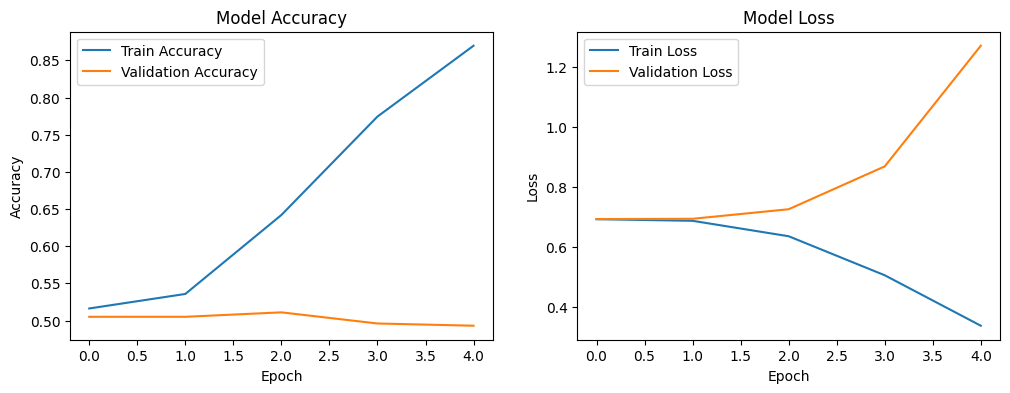

Plots displayed.
Evaluating the model...
32/32 [==============================] - 1s 12ms/step - loss: 1.2714 - accuracy: 0.4930
LSTM Model Accuracy: 0.4930
Analyzing results...
32/32 [==============================] - 3s 24ms/step
              precision    recall  f1-score   support

        Fake       0.50      0.35      0.41       505
        True       0.49      0.64      0.56       495

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.49      0.49      0.48      1000

Accuracy: 0.4930
Results analyzed.


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Plot training and validation metrics
print("Plotting training and validation metrics...")
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()
print("Plots displayed.")

# Evaluate the model
print("Evaluating the model...")
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test, verbose=1)
print(f"LSTM Model Accuracy: {accuracy:.4f}")

# Analyze results
print("Analyzing results...")
y_pred = (model_lstm.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Fake", "True"]))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Results analyzed.")

32/32 [==============================] - 1s 11ms/step


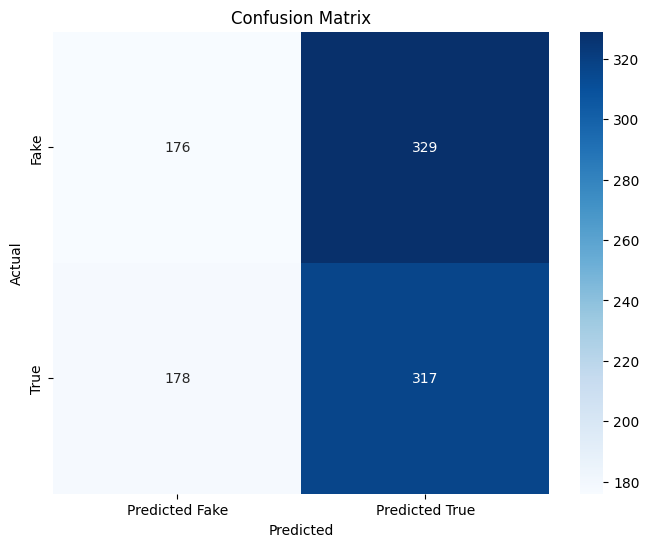

,precision,recall,f1-score,support
Fake,0.497175,0.348515,0.409779,505.000
True,0.490712,0.640404,0.555653,495.000
accuracy,0.493000,0.493000,0.493000,0.493
macro avg,0.493944,0.494459,0.482716,1000.000
weighted avg,0.493976,0.493000,0.481987,1000.000


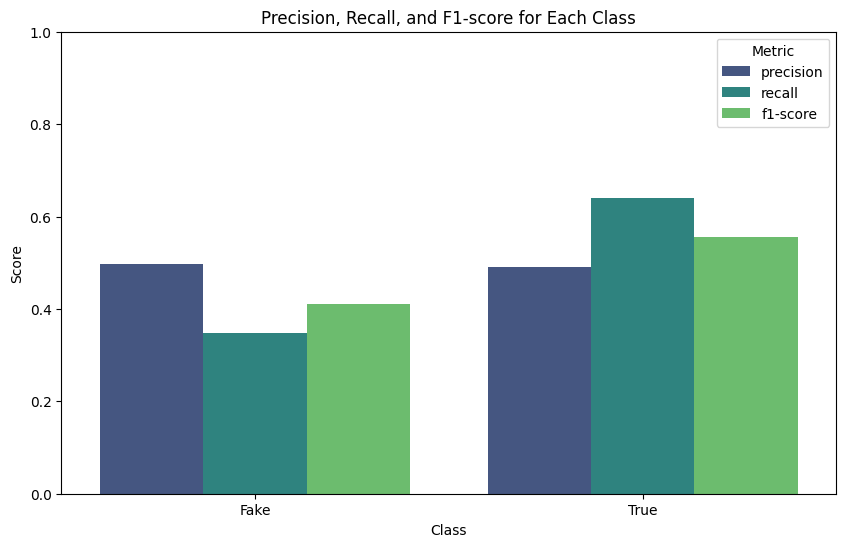

,Metric,Value
0,Accuracy,0.493


In [4]:
# Import necessary libraries for visualization
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate predictions
y_pred_prob = model_lstm.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Fake', 'True'], columns=['Predicted Fake', 'Predicted True'])

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Fake', 'True'], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Display classification report as a table
display(class_report_df)

# Plotting the metrics (Precision, Recall, F1-score) for better understanding with separate bars
metrics_df = class_report_df.loc[['Fake', 'True'], ['precision', 'recall', 'f1-score']].reset_index()

# Melt the dataframe to make it suitable for seaborn's barplot
metrics_df_melted = pd.melt(metrics_df, id_vars="index", var_name="Metric", value_name="Score")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Score', hue='Metric', data=metrics_df_melted, palette='viridis')

plt.title('Precision, Recall, and F1-score for Each Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.ylim(0, 1)  # Precision, Recall, F1-score are between 0 and 1
plt.legend(loc='upper right', title='Metric')
plt.show()


# Summarized metrics
accuracy = accuracy_score(y_test, y_pred)
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy]
})

# Display the metrics in a table
display(metrics_df)


**Transformers Model:**

We'll use a pre-trained BERT model for text classification.

In [7]:
# Import necessary libraries
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from tqdm.auto import tqdm  # Import tqdm for progress bar
from sklearn.model_selection import train_test_split

# Load datasets
print("Loading datasets...")
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake['label'] = 0
true['label'] = 1

# Combine datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for missing values
print("Checking for missing values...")
print(news.isnull().sum())

# Display the first few rows of the dataset
print("Sample data:")
print(news.head())

# Separate features and labels
X = news['text']  # Replace 'text' with the actual column name containing the news content
y = news['label']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for TPU, MPS (Apple Silicon GPU), CUDA (NVIDIA GPU), or fallback to CPU
try:
    import tensorflow as tf
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    device = 'TPU'
    print("Using TPU")
except:
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("Using MPS (Apple Silicon GPU)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using CUDA (NVIDIA GPU)")
    else:
        device = torch.device("cpu")
        print("Using CPU")

# Load and prepare BERT tokenizer
print("Loading BERT tokenizer...")
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(texts):
    encodings = {'input_ids': [], 'attention_mask': []}

    # Initialize tqdm progress bar
    for text in tqdm(texts, desc="Tokenizing", unit="text"):
        encoding = bert_tokenizer(text, padding='max_length', truncation=True, return_tensors='pt')
        encodings['input_ids'].append(encoding['input_ids'].squeeze().tolist())
        encodings['attention_mask'].append(encoding['attention_mask'].squeeze().tolist())

    return encodings

# Tokenize training and test data
print("Tokenizing training data...")
train_encodings = tokenize_function(X_train.tolist())

print("Tokenizing test data...")
test_encodings = tokenize_function(X_test.tolist())

# Convert labels to tensors
print("Converting labels to tensors...")
train_labels = torch.tensor(y_train.tolist())  # Keep on CPU for DataLoader
test_labels = torch.tensor(y_test.tolist())    # Keep on CPU for DataLoader

# Create custom dataset class
print("Creating custom dataset class...")
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Return tensors on the appropriate device
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]  # Ensure this is a tensor
        return item

    def __len__(self):
        return len(self.labels)

# Instantiate datasets
print("Creating training and test datasets...")
train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Load the BERT model for sequence classification
print("Loading BERT model...")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=8,  # Adjust based on available memory
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir='./logs',
    logging_steps=500,
    load_best_model_at_end=True,
    eval_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save the model at the end of each epoch to match evaluation strategy
)

# Create Trainer instance with verbose logging
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
print(f"Training the model on {device}...")
trainer.train()

# Evaluate the model
print("Evaluating the model...")
trainer.evaluate()

Loading datasets...
Checking for missing values...
title      0
text       0
subject    0
date       0
label      0
dtype: int64
Sample data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 

/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Tokenizing:   0%|          | 0/35918 [00:00<?, ?text/s]

Tokenizing test data...


Tokenizing:   0%|          | 0/8980 [00:00<?, ?text/s]

Converting labels to tensors...
Creating custom dataset class...
Creating training and test datasets...
Loading BERT model...


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Training the model on mps...


Epoch,Training Loss,Validation Loss
1,0.000000,0.001278
2,0.004500,0.000394
3,0.000000,0.000015


Evaluating the model...


{'eval_loss': 1.5256036022037733e-05,
 'eval_runtime': 1562.3843,
 'eval_samples_per_second': 5.748,
 'eval_steps_per_second': 0.719,
 'epoch': 3.0}

In [8]:
# Display model architecture
print("Model architecture:")
print(model)

Model architecture:
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Laye

1. **Evaluate Metrics:** Based on accuracy and classification reports from traditional models and performance metrics from advanced models.
2. **Visualize Performance:** Plot confusion matrices, ROC curves, and other relevant metrics.

**Recommendation:**
- **Traditional Models** (e.g., Naive Bayes with TF-IDF) are quick and interpretable.
- **Advanced Models** (e.g., BERT) often yield better accuracy and performance but require more computational resources.

Choose the model based on accuracy, computational resources, and deployment requirements.

**Note:** For LSTM and Transformers, make sure you have TensorFlow and Hugging Face's `transformers` library installed, and that you have a GPU available for faster training.